<a href="https://colab.research.google.com/github/storyrago/2025-2-BigData/blob/main/12%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("국민건강보험공단_건강검진정보_2024.CSV", encoding='cp949')

# 5개 행만 선택
df_sample = df.head(50)

X = df_sample.iloc[:, [6, 7]].values  # 체중(6), 허리둘레(7)
y = df_sample.iloc[:, 14].values       # 식전혈당(14)

model = LinearRegression()
model.fit(X, y)

new_data = np.array([[13, 75]])  # 체중 65kg, 허리둘레 75cm
prediction = model.predict(new_data)
print(f"\n체중 65kg, 허리둘레 75cm인 사람의 예상 혈당: {prediction[0]:.1f}")


체중 65kg, 허리둘레 75cm인 사람의 예상 혈당: 96.8


In [58]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [59]:
new_data = np.array([[70,65]])
predicted_data = model.predict(new_data)

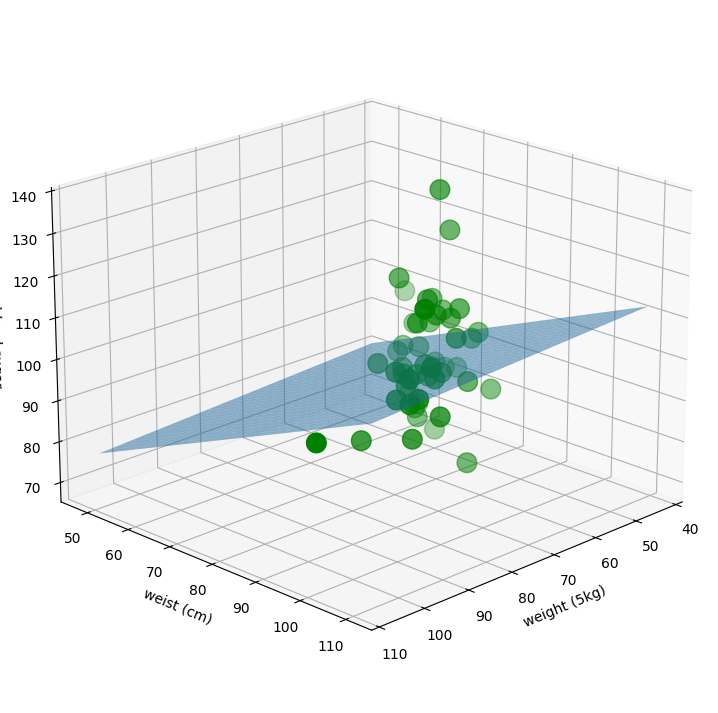

In [60]:
x1_range = np.linspace(X[:, 0].min()-2, X[:, 0].max()+2, 30)
x2_range = np.linspace(X[:, 1].min()-10, X[:, 1].max()+10, 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# 예측
y_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

# 그리기
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)
ax.scatter(X[:, 0], X[:, 1], y, c='green', s=200,)
ax.set_xlabel('weight (5kg)')
ax.set_ylabel('weist (cm)')
ax.set_zlabel('blood sugar')
ax.view_init(elev=20, azim=45)
plt.show()